In [ ]:
## Kmeans
## Violin plot

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#df = pd.read_csv("drug_resp.csv", header = None)
#df = df.T

#f1 = df[0].values

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

resp_sense=pd.read_csv('/content/pred_sens_jan12_headers.csv',index_col=0)
df= pd.read_excel('/content/DR_100-screened_drugs_imputed-new.xlsx',index_col=0)
#del df['CellLines']
drugs_name = pd.DataFrame(list(resp_sense))
#drugs_name.head()

In [ ]:
resp_sense

In [ ]:
drugs_name

,0
0,Tamoxifen
1,Dabrafenib
2,ABT_888
3,Lenalidomide
4,PLX4720
...,...
103,Niraparib
104,Olaparib
105,Palbociclib
106,Ribociclib


In [ ]:
resp_sense.shape

(42, 108)

In [ ]:
drugs_name.iloc[1,0]

'Dabrafenib'

In [ ]:

compiled_drugs=pd.DataFrame()
drug1=pd.DataFrame()
for i in range(0,15):
  print("Drug", i)
  drug1['IC50'] = df.iloc[:,i] 
  drug1['Label'] = resp_sense.iloc[:,i]
  
    #drug1['DrugName']=drugs_name[j]
  #drug1['Drug'] = [i] * 42
  drug1['Drug']=drugs_name.iloc[i,0]
  #drug1 = drug1.sort_values(by ='IC50')
  #drug1.reset_index(drop=True,inplace=True)
    #j=j*42
  compiled_drugs = pd.concat([compiled_drugs,drug1])
print( compiled_drugs.tail())

Drug 0
Drug 1
Drug 2
Drug 3
Drug 4
Drug 5
Drug 6
Drug 7
Drug 8
Drug 9
Drug 10
Drug 11
Drug 12
Drug 13
Drug 14
               IC50  Label    Drug
CellLines                         
MFM-223    0.049606      0  WZ3105
MRK-NU-1  -0.264141      0  WZ3105
OCUB-M    -2.176039      1  WZ3105
T47D      -0.515776      1  WZ3105
UACC-893  -0.673904      1  WZ3105


In [ ]:
compiled_drugs

In [ ]:
compiled_drugs.to_csv("drug_Cellline_sense_Jan20.csv")

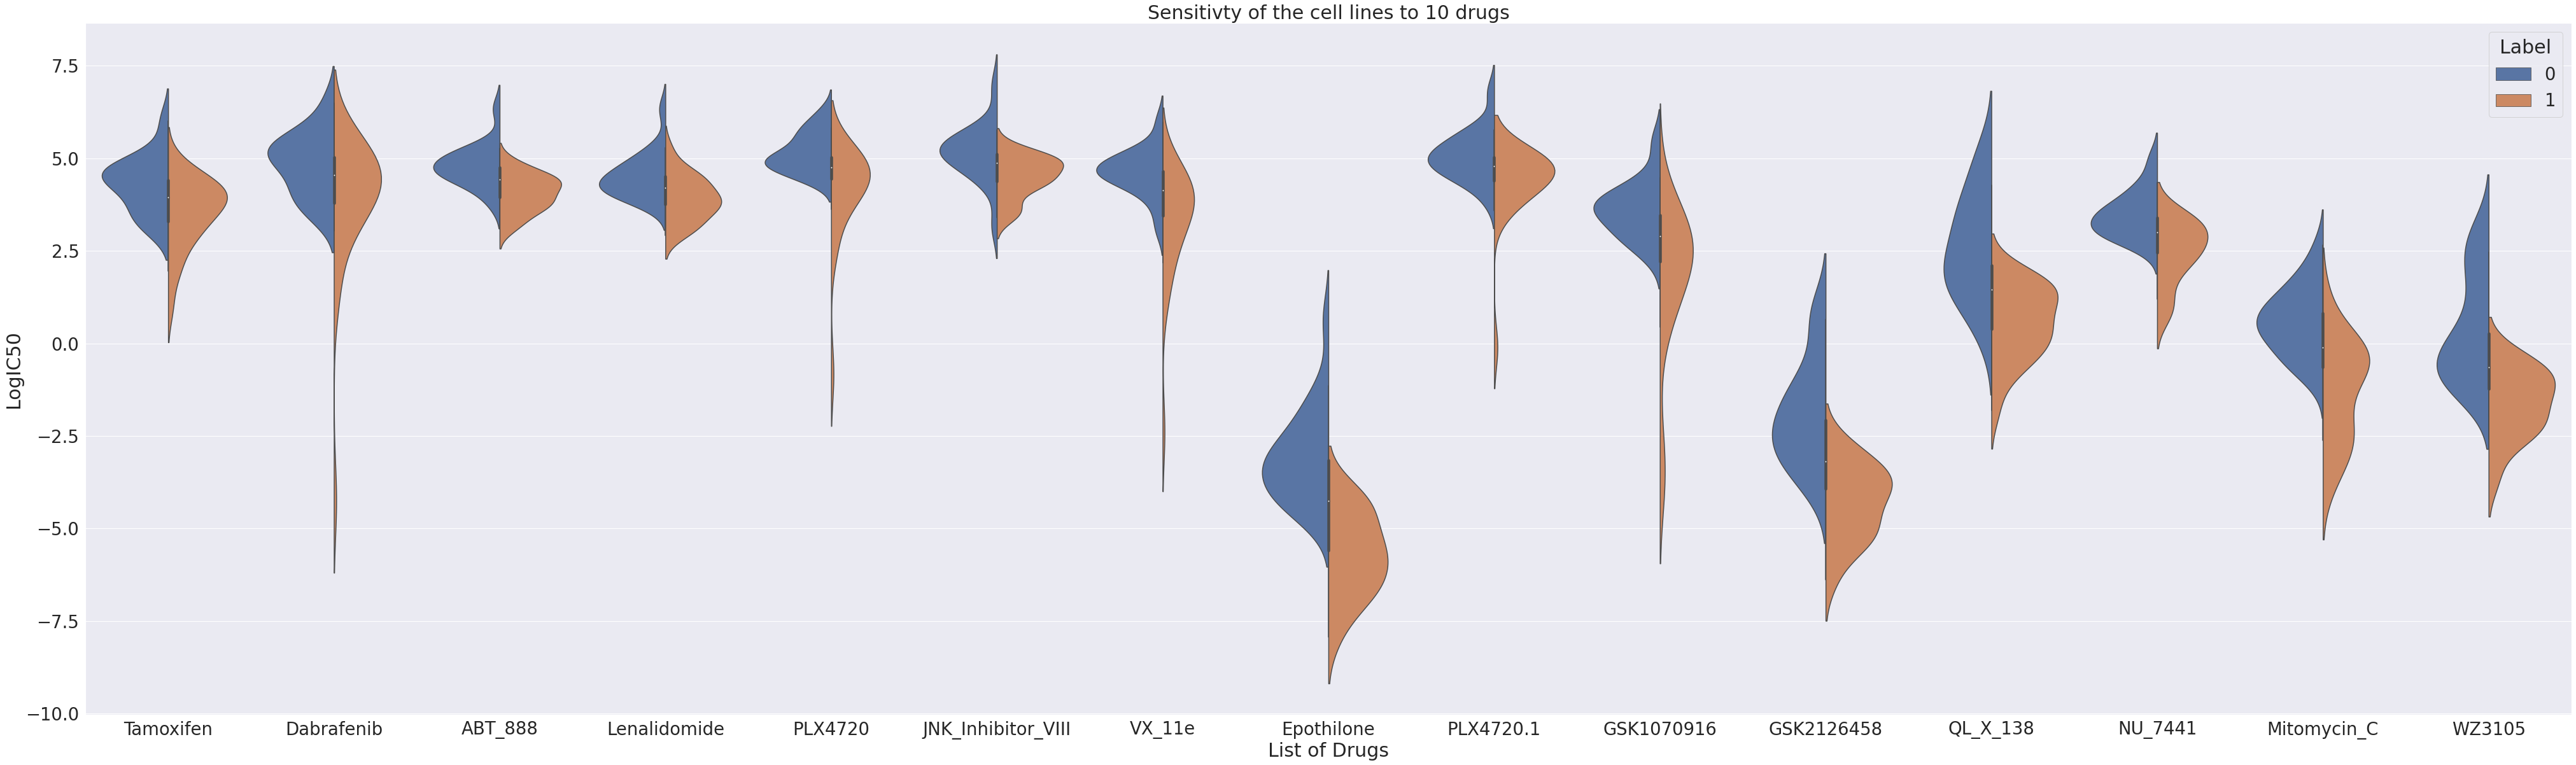

In [ ]:
#Violin plot
import seaborn as sns
violin_plot_drugs = plt.figure(figsize=(70,20))
sns.set(font_scale=2.5)
ax = sns.violinplot(x="Drug", y="IC50", scale_hue=True,hue="Label", data=compiled_drugs, split=True, legend_out = True)
ax.set(xlabel='List of Drugs', ylabel='LogIC50',title="Sensitivty of the cell lines to 10 drugs")
# replace labels

violin_plot_drugs.savefig('violin_plot_drugs.svg', format='svg', dpi=1200)

In [ ]:
tcga_resp_sense=pd.read_csv('/content/TCGA_pred_sens_Jan_10.csv',index_col=0)
df1=pd.read_csv('/content/TCGA_IC50Predicted_Jan_10.csv',index_col=0)

In [ ]:
tcga_resp_sense=tcga_resp_sense.loc[0:50,:]
df1=df1.loc[0:50,:]

In [ ]:
tcga_resp_sense

,Tamoxifen,Dabrafenib,ABT_888,Lenalidomide,PLX4720,JNK_Inhibitor_VIII,VX_11e,Epothilone_B,PLX4720__rescreen_,GSK1070916,GSK2126458,QL_X_138,NU_7441,Mitomycin_C,WZ3105,CP724714,AC220,Tipifarnib,SNX_2112,PI_103,LAQ824,JQ1,SGC0946,GSK429286A,AS605240,SB590885,SB_715992,TL_1_85,Ruxolitinib,OSI_027,KIN001_102,I_BET,Midostaurin,Y_39983,HG_6_64_1,PIK_93,JW_7_24_1,MPS_1_IN_1,BX_795,STF_62247,...,Masitinib,CCT007093,Nutlin_3a,Trametinib,VNLG_124,UNC1215,KIN001_055,AV_951,NSC_207895,JQ12,Temozolomide,EX_527,X5_Fluorouracil,PHA_793887,KIN001_244,AUY922,SB52334,Temsirolimus,ZSTK474,NVP_BEZ235,Vinblastine,YM201636,YK_4_279,KIN001_266,GSK690693,PXD101__Belinostat,CEP_701,IOX2,FTI_277,Talazoparib,Taselisib,Dinaciclib,Lapatinib,Niraparib,Olaparib,Palbociclib,Ribociclib,Alpelisib,ID,Subtype
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,TCGA-BH-A0AZ,Luminal
1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,TCGA-BH-A1EX,Luminal
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,TCGA-B6-A0RN,Luminal
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,TCGA-E2-A1BC,Luminal
4,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,TCGA-OL-A5DA,Unknown
5,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,TCGA-AR-A2LO,Unknown
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,TCGA-AR-A24P,Luminal
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,TCGA-E2-A1IN,Luminal
8,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,TCGA-E2-A1LH,Basal
9,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,

In [ ]:
compiled_drugs_tcga=pd.DataFrame()
drug1_tcga=pd.DataFrame()

In [ ]:

for i in range(0,15):
 drug1_tcga['IC50'] = df1.iloc[:,i] 
 drug1_tcga['Class'] = tcga_resp_sense.iloc[:,0]
 drug1_tcga['Subtype']=tcga_resp_sense["Subtype"]
    #drug1['DrugName']=drugs_name[j]
  #drug1['Drug'] = [i] * 42
 drug1_tcga['Drug']=drugs_name.iloc[i,0]
 #drug1 = drug1.sort_values(by ='IC50')
 #drug1.reset_index(drop=True,inplace=True)
    #j=j*42
 compiled_drugs_tcga = pd.concat([compiled_drugs_tcga,drug1_tcga])
print( compiled_drugs_tcga.tail())

        IC50  Class  Subtype    Drug
46 -1.334929      0  Unknown  WZ3105
47 -1.381671      0  Luminal  WZ3105
48 -1.207531      0  Luminal  WZ3105
49 -1.407026      0  Luminal  WZ3105
50 -1.256324      1  Luminal  WZ3105


In [ ]:
compiled_drugs_tcga

,IC50,Class,Drug
0,4.228844,0.0,Tamoxifen
1,4.159331,0.0,Tamoxifen
2,4.083825,0.0,Tamoxifen
3,3.693626,1.0,Tamoxifen
4,4.094962,0.0,Tamoxifen
...,...,...,...
46,0.539507,0.0,PI_103
47,0.474429,0.0,PI_103
48,0.898257,0.0,PI_103
49,0.296157,0.0,PI_103


In [ ]:
compiled_drugs_tcga.to_csv("drug_tcga_sense_Jan6.csv")

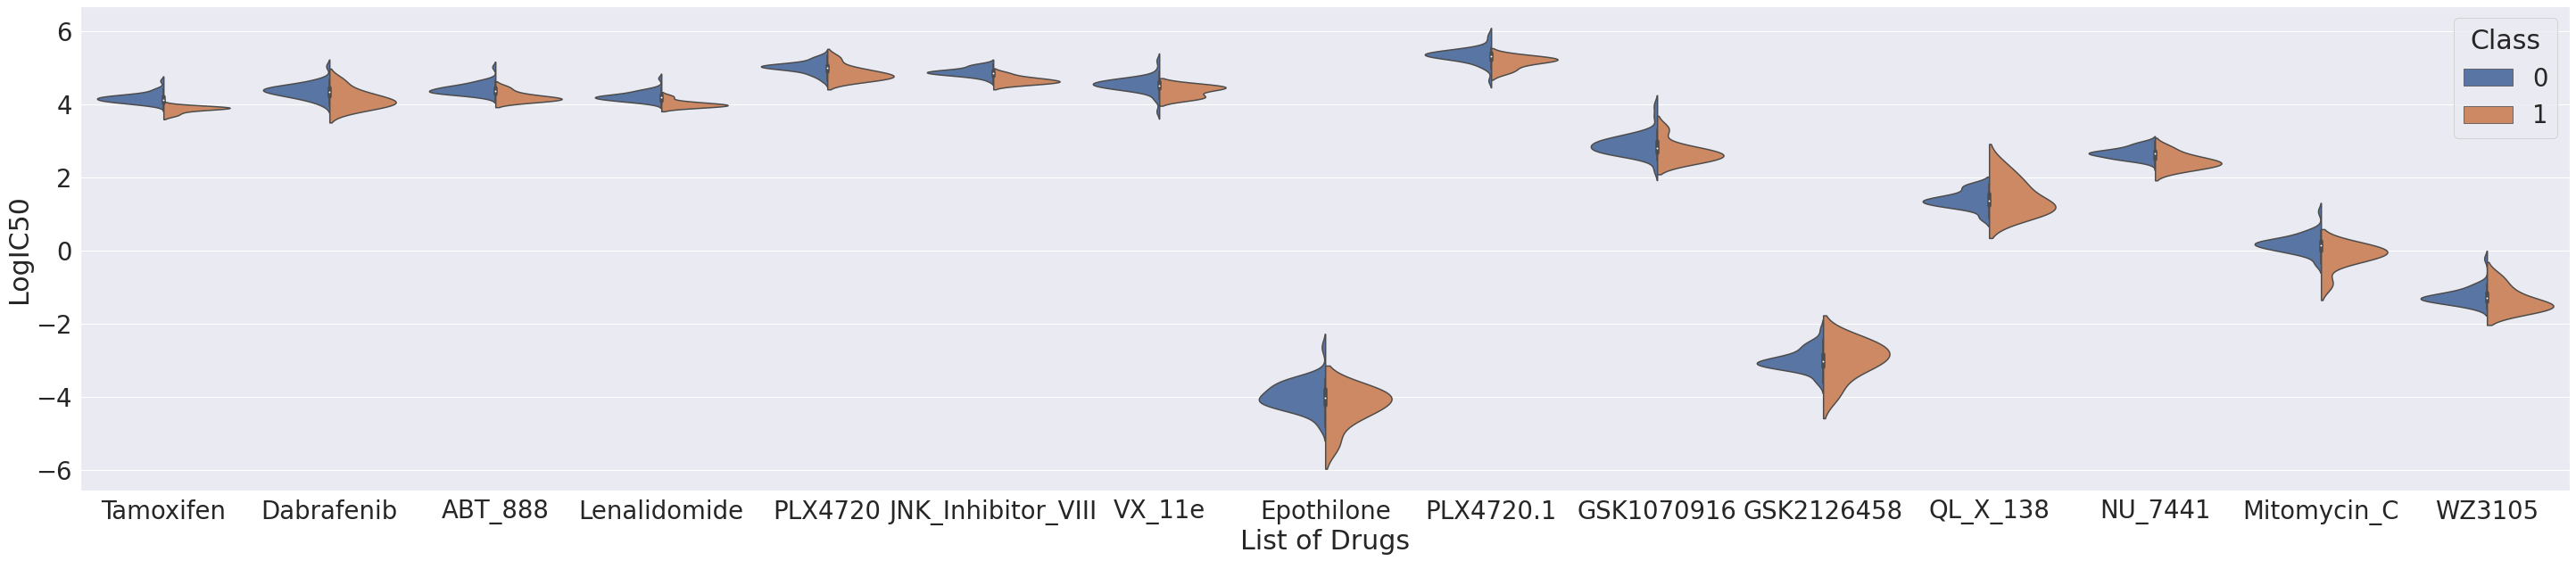

In [ ]:
import seaborn as sns
violin_plot_drugs_tcga = plt.figure(figsize=(50,10))
#ax = sns.violinplot(x="Drug", y="IC50", hue="Class", scale_hue=True,data=compiled_drugs_tcga[compiled_drugs_tcga.IC50<4.0], split=True, legend_out = True)
ax = sns.violinplot(x="Drug", y="IC50", hue="Class",scale_hue=True,scale="width",split=True,data=compiled_drugs_tcga,  legend_out = True)

ax.set(xlabel='List of Drugs', ylabel='LogIC50')
# replace labels

violin_plot_drugs_tcga.savefig('violin_plot_drugs.svg', format='svg', dpi=1200)

In [ ]:
avg=pd.read_csv('/content/avg_pred_values_celllines_jan6.csv')

FileNotFoundError: ignored

In [ ]:
sort_dcn=avg["DCNN"].sort_values

In [ ]:
values.shape

(1000,)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


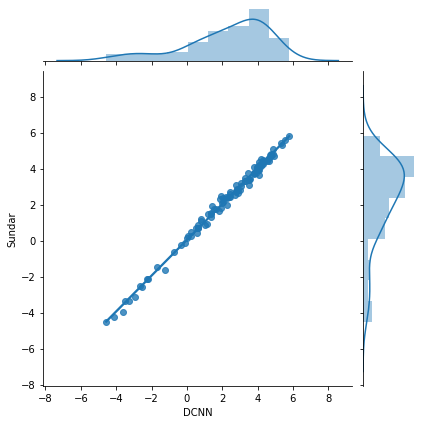

In [ ]:
g = sns.JointGrid(x="DCNN", y="Sundar", data=avg)
g = g.plot(sns.regplot, sns.distplot)